In [41]:
import pandas as pd
import numpy as np
import math

In [42]:
df = pd.read_hdf('stocksCleaned.h5')

In [43]:
df = df[df.ticker == 'UBER']

In [44]:
del df['news_sentiment_score']

In [45]:

df.corr().style.background_gradient(cmap='Blues')

,amount_of_articles,open,close,volume,social_sentiments,mentions,news_sentiment,close_better,tomorrow_better
amount_of_articles,1.000000,-0.213240,-0.281517,0.573429,-0.191029,-0.002461,-0.006205,-0.162104,-0.009743
open,-0.213240,1.000000,0.967242,-0.222201,-0.068064,-0.066593,0.178991,-0.075768,-0.126576
close,-0.281517,0.967242,1.000000,-0.297773,-0.066920,-0.015082,0.218675,0.125244,-0.149130
volume,0.573429,-0.222201,-0.297773,1.000000,-0.001326,0.047856,-0.031053,-0.099091,0.085770
social_sentiments,-0.191029,-0.068064,-0.066920,-0.001326,1.000000,-0.005804,0.080853,-0.046460,-0.060499
mentions,-0.002461,-0.066593,-0.015082,0.047856,-0.005804,1.000000,0.007724,0.118477,0.190406
news_sentiment,-0.006205,0.178991,0.218675,-0.031053,0.080853,0.007724,1.000000,0.118709,-0.124105
close_better,-0.162104,-0.075768,0.125244,-0.099091,-0.046460,0.118477,0.118709,1.000000,-0.021110
tomorrow_better,-0.009743,-0.126576,-0.149130,0.085770,-0.060499,0.190406,-0.124105,-0.021110,1.000000


In [46]:
print(min(df['mentions'].values))
print(max(df['mentions'].values))

0
1814


In [47]:
# resize range of news score from 1 to 4 to -1 to 1 
inLow = 0
inHigh = 1814
outLow = 0
outHigh = 1

def resizeRange(inputNum):
    result = ((inputNum - inLow) / (inHigh - inLow)) * (outHigh - outLow) + outLow
    return result

mentions = []
for i in df["mentions"]:
    if math.isnan(i):
        mentions.append(0.0)
    else:
        mentions.append(resizeRange(i))
        
df['mentions'] = mentions

In [48]:
import matplotlib.pyplot as plt



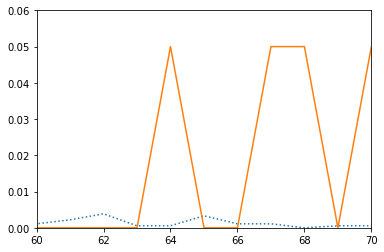

In [61]:
x = df['mentions'].values
y = list(df['close_better'].values)

itir = 0
for i in y:
    if i == 1:
        y[itir] = .05
    itir = itir+1

plt.plot(x, linestyle = 'dotted')
plt.plot(y)
plt.ylim(0, .06)
plt.xlim(60, 70)
plt.show()

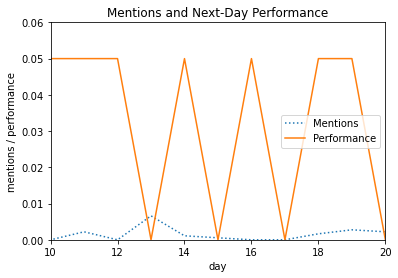

In [68]:
x = df['mentions'].values
y = list(df['tomorrow_better'].values)

itir = 0
for i in y:
    if i == 1:
        y[itir] = .05
    itir = itir+1

plt.plot(x, linestyle = 'dotted',label="Mentions")
plt.plot(y,label="Performance")
plt.ylim(0, .06)
plt.xlim(10, 20)
plt.xlabel("day")
plt.ylabel("mentions / performance")
plt.title("Mentions and Next-Day Performance")
plt.legend()
plt.show()